In [1]:
from emukit.examples.multi_fidelity_dgp.baseline_model_wrappers import LinearAutoRegressiveModel
import numpy as np

import matplotlib.pyplot as plt

def f_low(x):
    return np.sin(8*np.pi*x)

def f_high(x):
    return (x-np.sqrt(2)) * (f_low(x))**2

num_cheap = 30
num_expensive = 10

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
X=[]
X.append(X1)
X.append(X2)

Y=[]
Y.append(Yc)
Y.append(Ye)

In [3]:
m1 =  LinearAutoRegressiveModel(X, Y)
m1.optimize()

Optimization restart 1/10, f = 24.02165778560076
Optimization restart 2/10, f = -75.40715665525649
Optimization restart 3/10, f = -75.40715669052682
Optimization restart 4/10, f = -75.4071566653347
Optimization restart 5/10, f = 24.02173012595411
Optimization restart 6/10, f = -75.40715667832012
Optimization restart 7/10, f = -75.40715667129756
Optimization restart 8/10, f = -75.40715666954408
Optimization restart 9/10, f = -75.4071566483938
Optimization restart 10/10, f = -75.40715669634909
Optimization restart 1/10, f = -102.54148206613178
Optimization restart 2/10, f = -95.91923689236827
Optimization restart 3/10, f = 31.787485676220765
Optimization restart 4/10, f = 31.787544659019886
Optimization restart 5/10, f = 31.787296596106955
Optimization restart 6/10, f = 31.78729669440466
Optimization restart 7/10, f = 31.787296649200773
Optimization restart 8/10, f = -95.91490587316639
Optimization restart 9/10, f = 31.78760498184832
Optimization restart 10/10, f = 31.78729671579592


In [4]:
X_test = np.linspace(0,1,99)[:,None]

tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
#tmp.shape

X_test = np.hstack((X_test,tmp))

y_mean, y_var = m1.predict(X_test)

In [5]:
y_up = y_mean+1.96*np.sqrt(y_var)
y_down = y_mean - 1.96*np.sqrt(y_var)

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

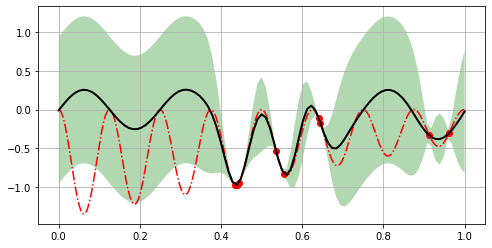

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.grid()
plt.show()

In [7]:
fig.savefig('nonlinearA_AR1.pdf', bbox_inches='tight')

In [8]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [19]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Yc,Ye],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()

In [20]:
m.optimize_restarts(num_restarts = 2)

Optimization restart 1/2, f = -12.403643877275663
Optimization restart 2/2, f = 44.95893550843765


In [22]:
Xt1 = np.random.rand(100)[:,None]*1.2
Xt2 = np.random.rand(100)[:,None]*1.2

Yt1 = f_low(Xt1)
Yt2 = f_high(Xt2)

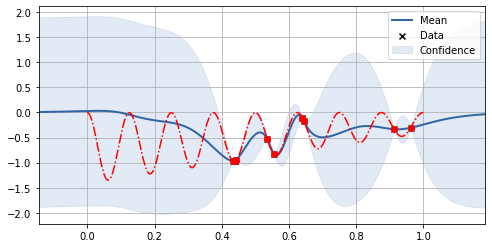

In [28]:
#fig = pb.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize=(8, 4))
m.plot(fixed_inputs=[(1,1)],which_data_rows=slice(num_cheap,num_cheap+num_expensive),ax=ax)
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
plt.grid()

In [29]:
fig.savefig('nonlinearA_LCM.pdf', bbox_inches='tight')